In [6]:
# Using IO module to read Audio Files
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read("welcome.wav")

In [7]:
# Output the parameters: Signal Data Type, Sampling Frequency and Duration
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')


Shape of Signal: (94208,)
Signal Datatype: int16
Signal duration: 1.96 seconds


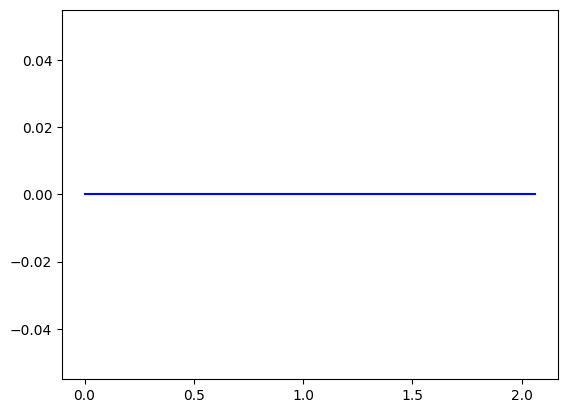

In [8]:
# Normalize the Signal Value and Plot it on a graph
pow_audio_signal = sig_audio / np.power(2, 15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)
plt.plot(time_axis, pow_audio_signal, color='blue')

In [9]:
# Working on the same input file
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)

In [10]:
# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)

In [11]:
# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)

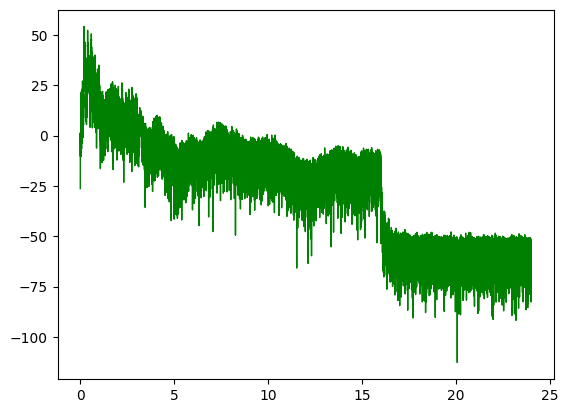

In [12]:
# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
  signal_freq[1:transform_len] *= 2
else:
  signal_freq[1:transform_len-1] *= 2
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)

In [14]:
# Installing and importing necessary libraries
#pip install python_speech_features
from python_speech_features import mfcc, logfbank
sampling_freq, sig_audio = wavfile.read("Welcome.wav")
# We will now be taking the first 15000 samples from the signal for analysis
sig_audio = sig_audio[:15000]
# Using MFCC to extract features from the signal
mfcc_feat = mfcc(sig_audio, sampling_freq)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])



MFCC Parameters
Window Count = 30
Individual Feature Length = 13


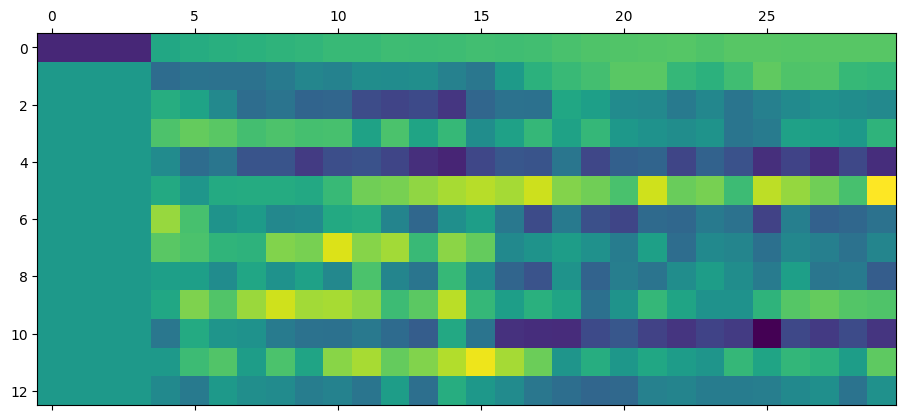

In [15]:

mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)

In [16]:
# Generating filter bank features
fb_feat = logfbank(sig_audio, sampling_freq)
print('\nFilter bank\nWindow Count =', fb_feat.shape[0])
print('Individual Feature Length =', fb_feat.shape[1])


Filter bank
Window Count = 30
Individual Feature Length = 26


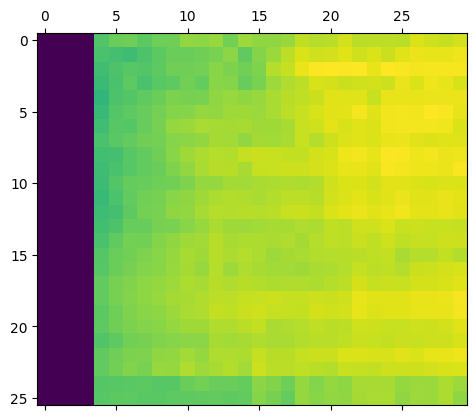

In [17]:
fb_feat = fb_feat.T
plt.matshow(fb_feat)

In [19]:
#pip install pyaudio
import speech_recognition as speech_recog
# Creating a recording object to store input
rec = speech_recog.Recognizer()
# Importing the microphone class to check availabiity of microphones
mic_test = speech_recog.Microphone()
# List the available microphones
speech_recog.Microphone.list_microphone_names()
# We will now directly use the microphone module to capture voice input. Specifying the second microphone to be used for a duration of 3 seconds. The algorithm will also adjust given input and clear it of any ambient noise
with speech_recog.Microphone(device_index=1) as source: 
    rec.adjust_for_ambient_noise(source, duration=3)
    print("Reach the Microphone and say something!")
    audio = rec.listen(source)

Reach the Microphone and say something!


In [20]:
# Use the recognize function to transcribe spoken words to text
try:
    print("I think you said: \n" + rec.recognize_google(audio))
except Exception as e:
    print(e)

result2:
{   'alternative': [{'confidence': 0.97219545, 'transcript': 'hello'}],
    'final': True}
I think you said: 
hello
